<a href="https://colab.research.google.com/github/vjbarayuga/Week8-Boosting_Models/blob/main/TitanicGradientBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all Necessary Libraries

In [7]:
# import google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Dataset

In [17]:
#download the titanic dataset here (https://www.kaggle.com/c/titanic/data)
df = pd.read_csv('/content/drive/MyDrive/Coding_DOJO-Data_Science_Bootcamp/03_Machine_Learning_Data_Science/04_Boosting_Models/Titanic Dataset/train.csv')

# Data Overview

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
df.shape

(891, 12)

# EDA

In [22]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

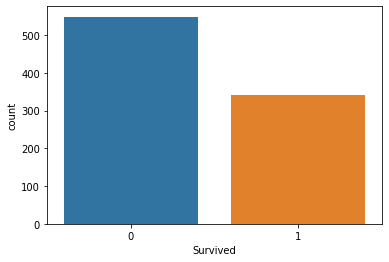

In [23]:
sns.countplot(data=df, x='Survived')

In [24]:
df.corr()['Survived'].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

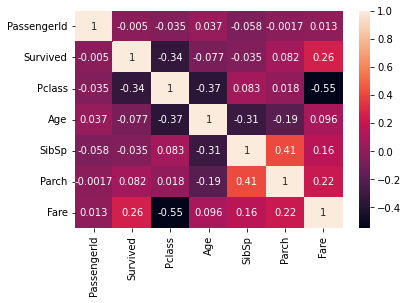

In [25]:
sns.heatmap(df.corr(),annot=True)

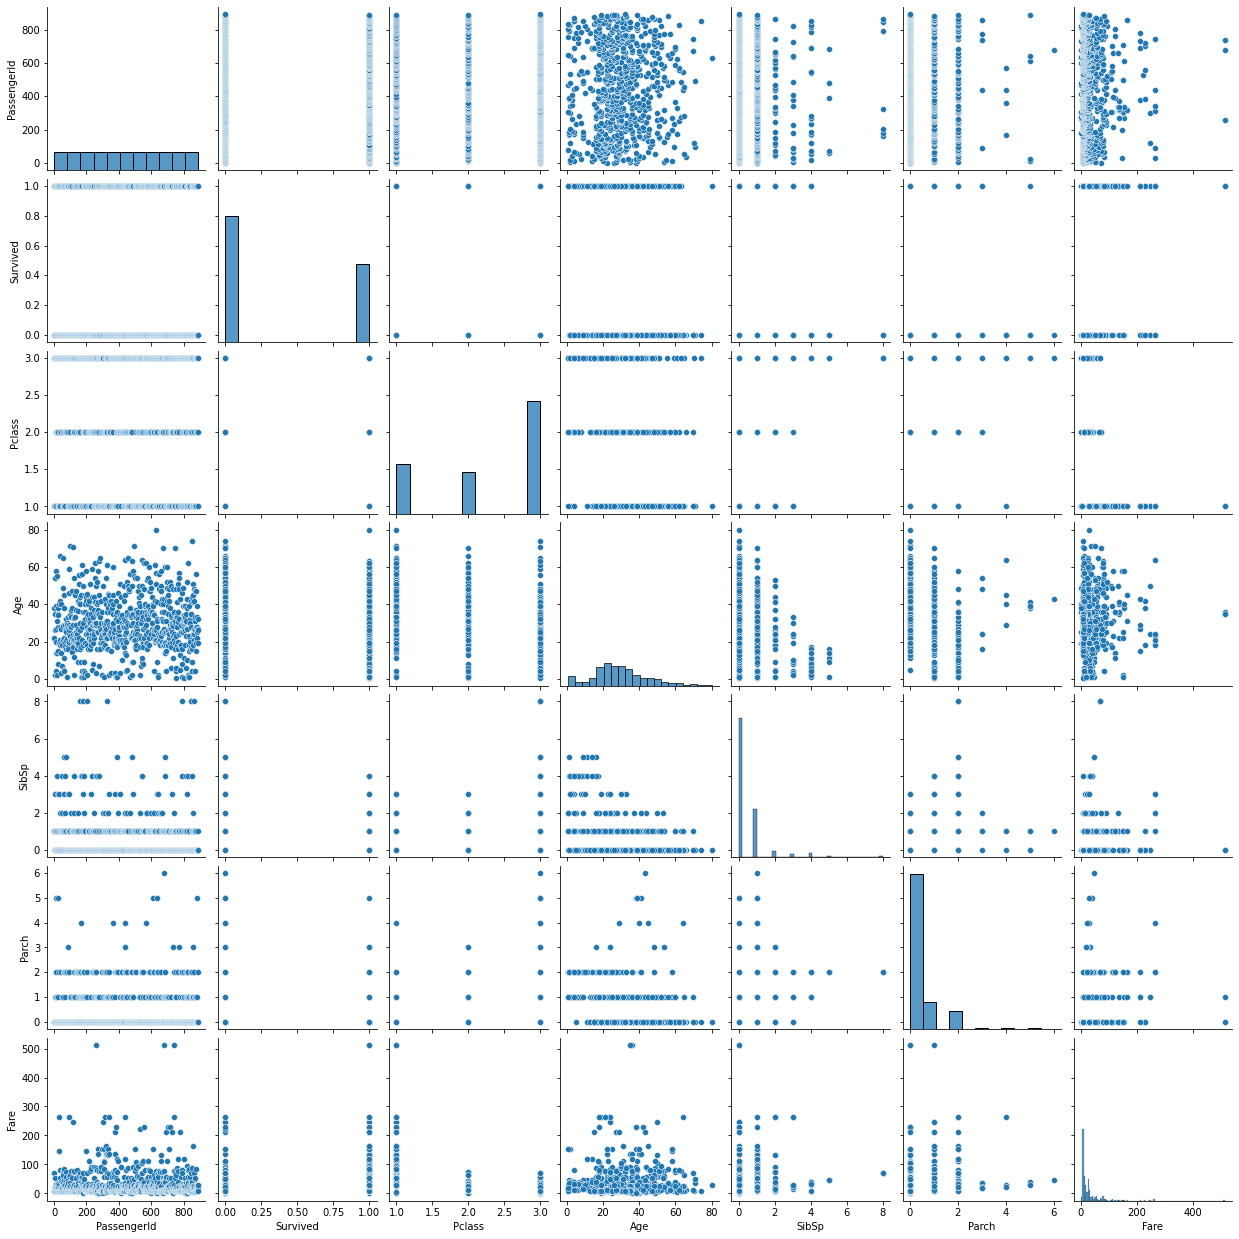

In [26]:
sns.pairplot(data=df)

# Data Preparation

In [27]:
((df.isnull().sum())/len(df))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [28]:
df.drop('Cabin',axis=1,inplace=True)

In [29]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [30]:
#There isn't missing values 
((df.isnull().sum())/len(df))*100

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [32]:
def missing_percent(df):
    nan_percent=((df.isnull().sum())/len(df))*100
    nan_percent=nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [33]:
nan_percent=missing_percent(df)

In [34]:
nan_percent

Embarked    0.224467
dtype: float64

In [35]:
df.drop(['PassengerId','Name','Ticket','Fare','Embarked'],axis=1, inplace=True)

In [36]:
df.loc[df['Sex']=='male','Sex']=1
df.loc[df['Sex']=='female','Sex']=0

In [37]:
#There isn't nan_percent
def missing_percent(df):
    nan_percent=((df.isnull().sum())/len(df))*100
    nan_percent=nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [38]:
nan_percent=missing_percent(df)

In [39]:
nan_percent

Series([], dtype: float64)

# Features & Label

In [70]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101, stratify=y)

# Scalling The Features

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler=StandardScaler()

In [75]:
scaler.fit(X_train)

StandardScaler()

In [76]:
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

# Train the Model

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
model = DecisionTreeClassifier()

In [79]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

# Predicting Test Data

In [80]:
y_pred = model.predict(X_test)

# Evaluating Model

In [81]:
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
confusion_matrix(y_test, y_pred)

array([[47,  8],
       [18, 17]])

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        55
           1       0.68      0.49      0.57        35

    accuracy                           0.71        90
   macro avg       0.70      0.67      0.67        90
weighted avg       0.71      0.71      0.70        90



In [84]:
model.feature_importances_

array([0.12990773, 0.39621948, 0.31929592, 0.10088844, 0.05368843])

In [85]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Pclass,0.129908
Sex,0.396219
Age,0.319296
SibSp,0.100888
Parch,0.053688


#  Visualize the Tree

In [86]:
from sklearn.tree import plot_tree

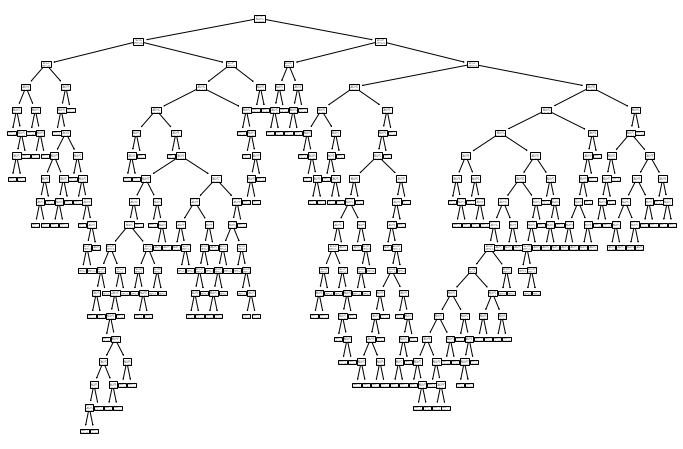

In [87]:
plt.figure(figsize=(12,8))
plot_tree(model);

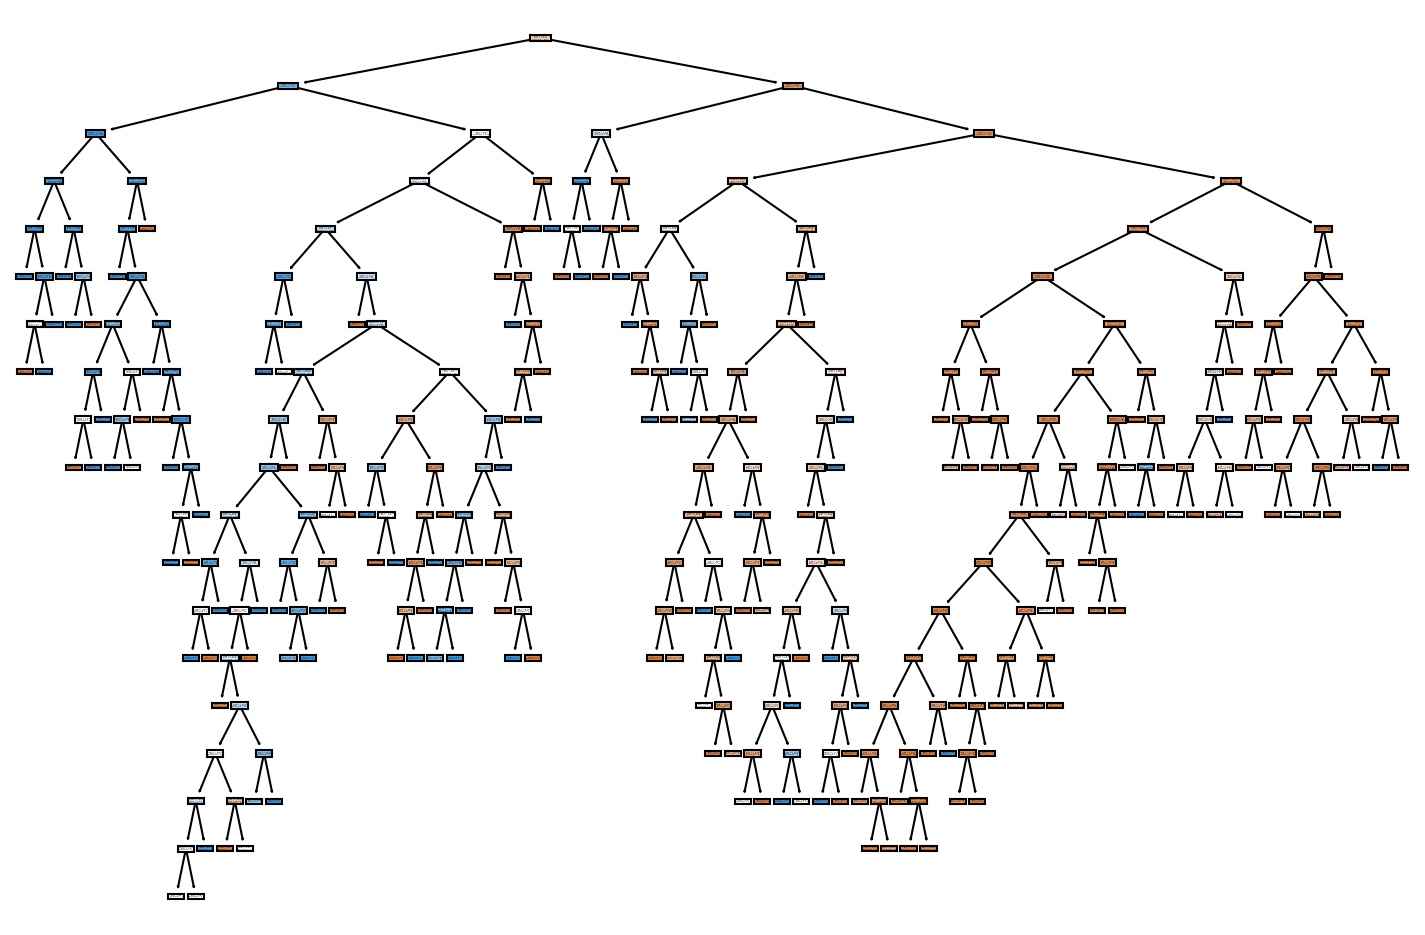

In [88]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

# Reporting Model Results

In [89]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

# Understanding Hyperparameters


In [90]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [91]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           0       0.72      0.96      0.82        55
           1       0.88      0.40      0.55        35

    accuracy                           0.74        90
   macro avg       0.80      0.68      0.69        90
weighted avg       0.78      0.74      0.72        90





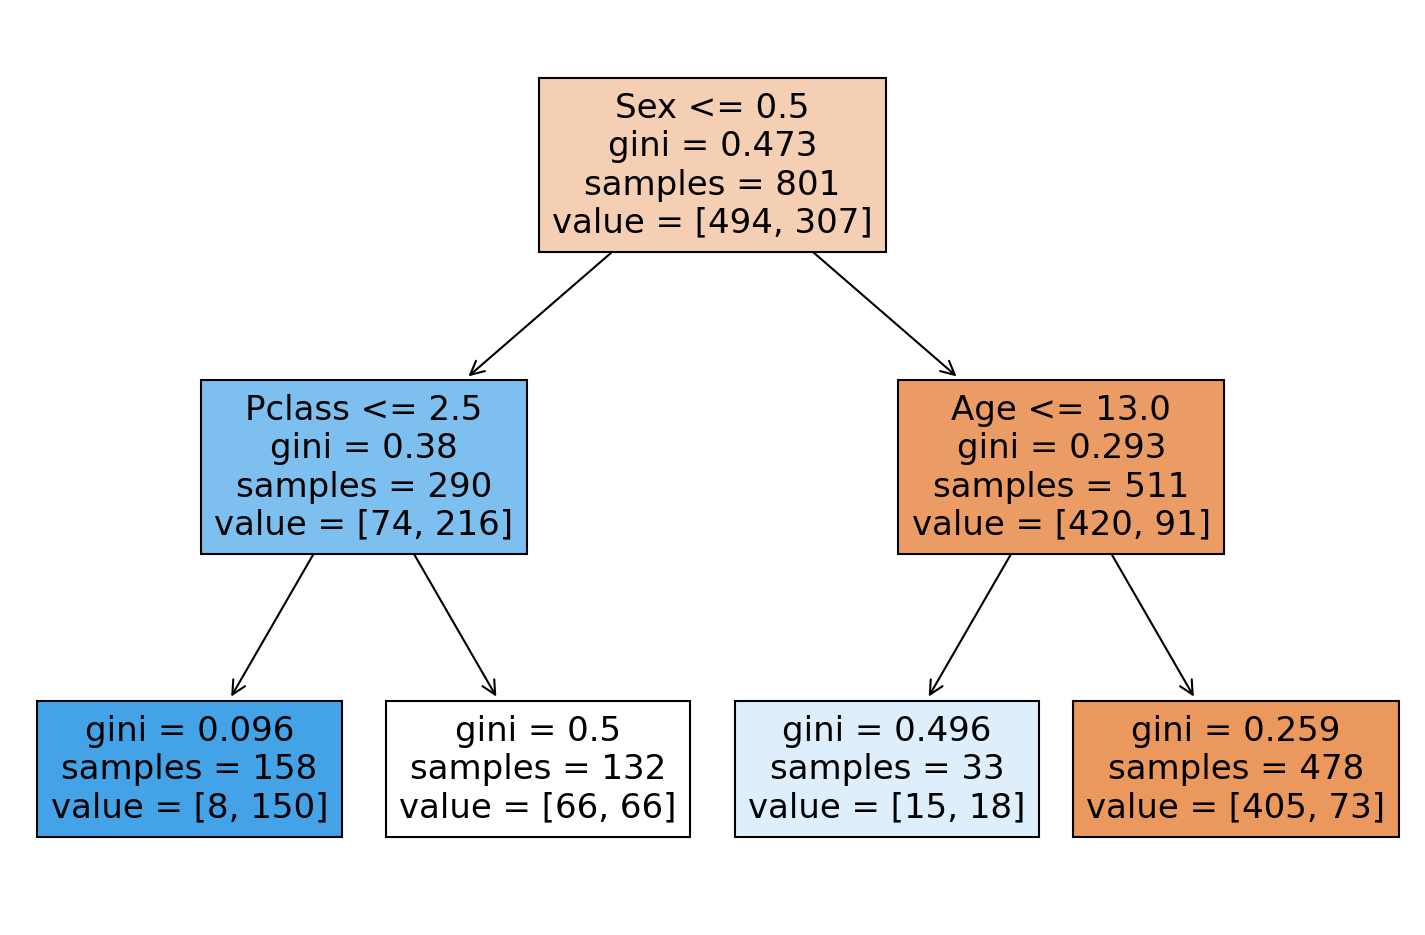

In [92]:
report_model(pruned_tree)

# Max Leaf Nodes

In [93]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       0.69      0.98      0.81        55
           1       0.92      0.31      0.47        35

    accuracy                           0.72        90
   macro avg       0.80      0.65      0.64        90
weighted avg       0.78      0.72      0.68        90





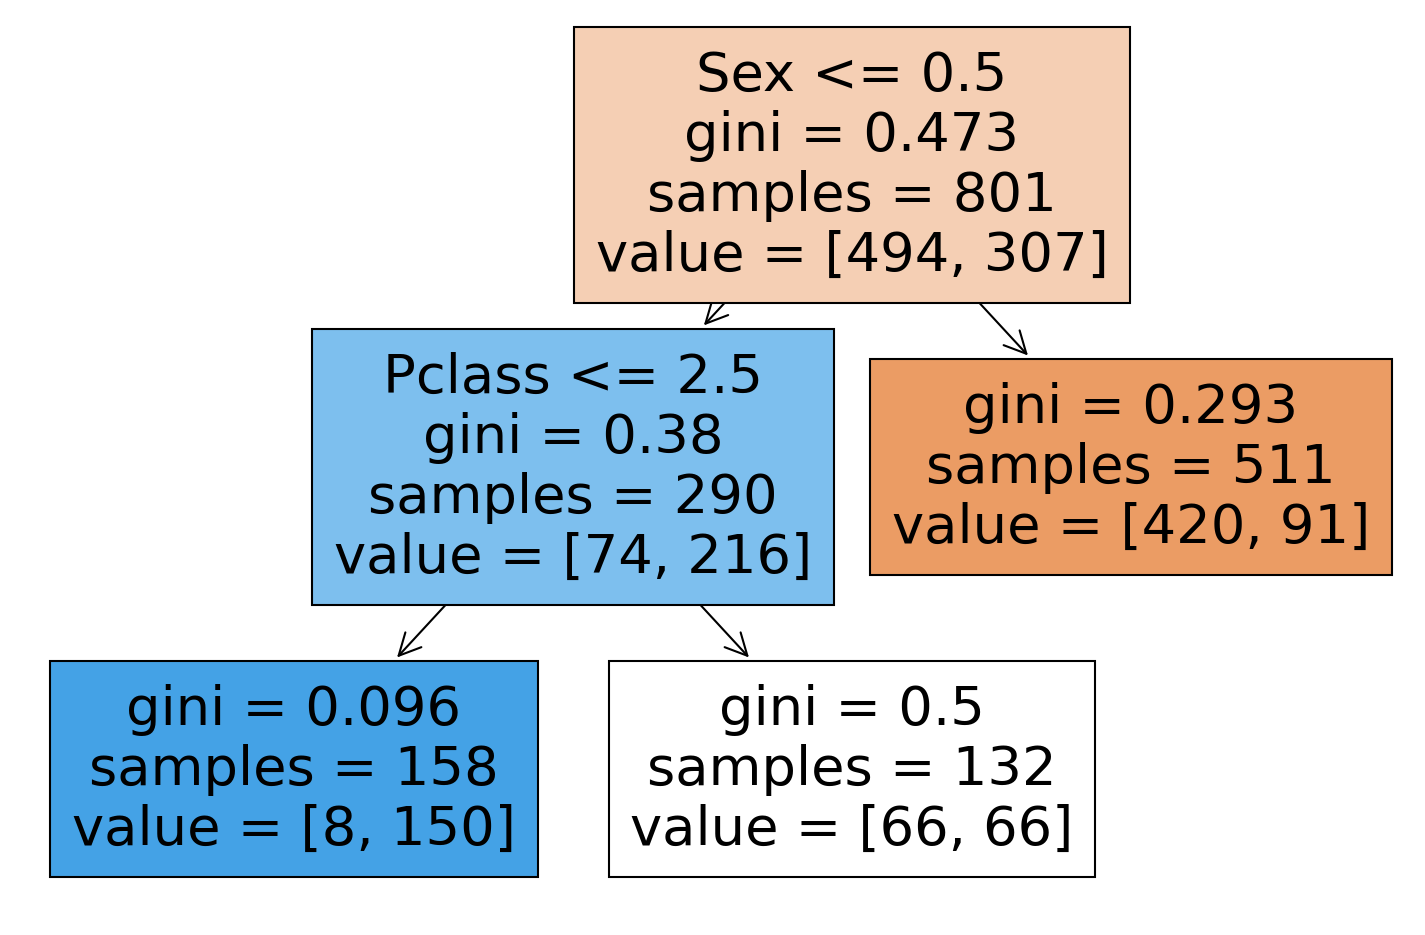

In [94]:
report_model(pruned_tree)

# Criterion

In [95]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        55
           1       0.67      0.51      0.58        35

    accuracy                           0.71        90
   macro avg       0.70      0.68      0.68        90
weighted avg       0.71      0.71      0.70        90





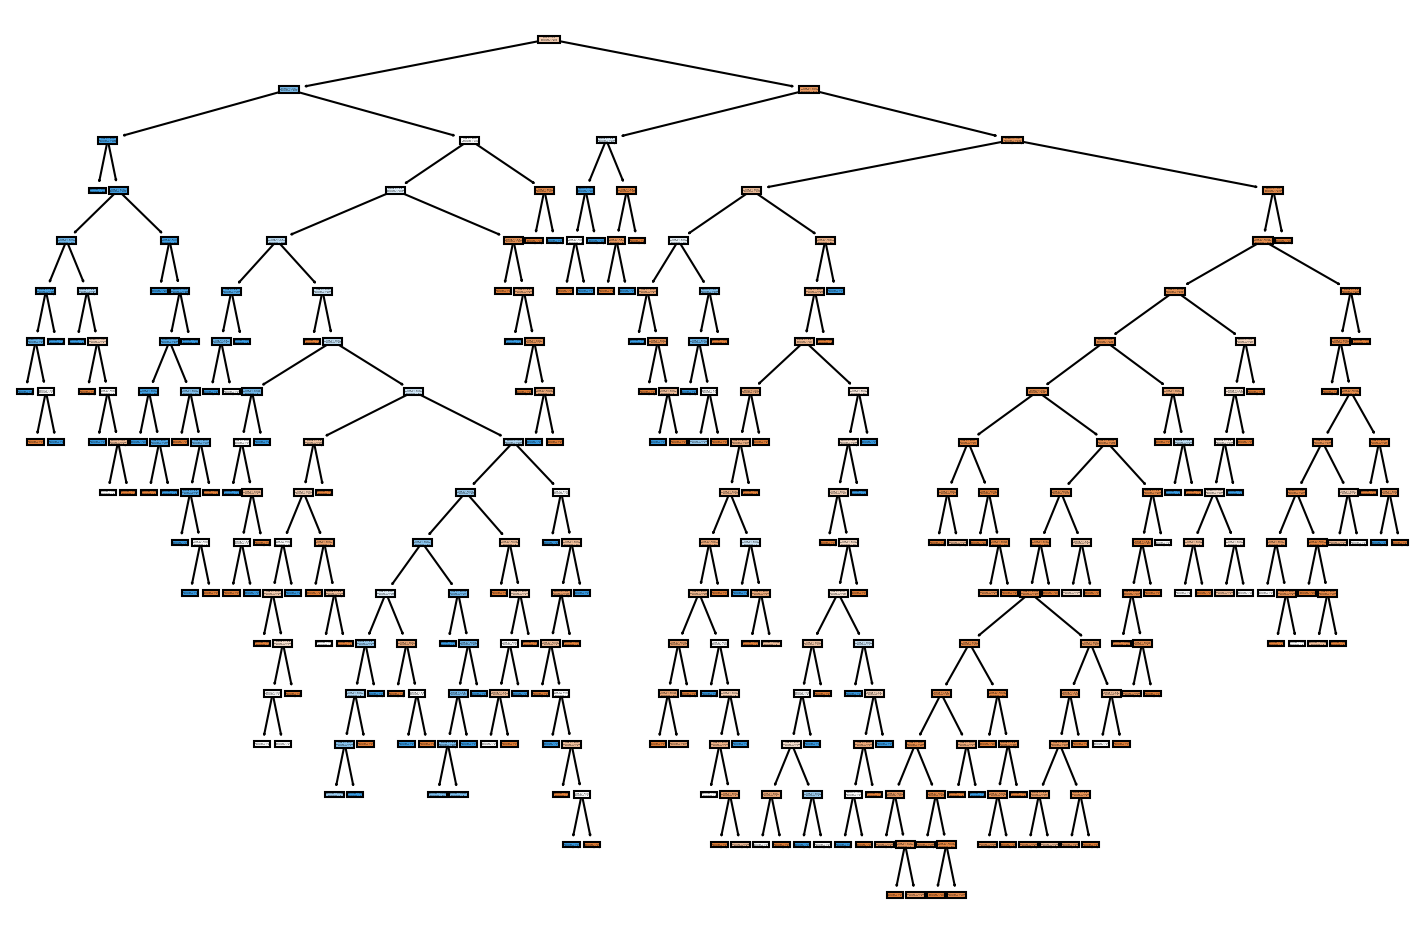

In [96]:
report_model(entropy_tree)

# Gradient Boost

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [100]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[50  5]
 [17 18]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        55
           1       0.78      0.51      0.62        35

    accuracy                           0.76        90
   macro avg       0.76      0.71      0.72        90
weighted avg       0.76      0.76      0.74        90

